# Customer Churn

A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Through this project I find out who is leaving and why.


Telco Churn is a hypothetical data file that concerns a telecommunications company's efforts to reduce turnover in its customer base. Each case corresponds to a separate customer and it records various demographic and service usage information.

### Libraries- pandas, matplotlib, numpy, scipy, sklearn

### Skills- Logistic Regression, Machine Learning, Data Analysis, Data Preprocessing, Modeling, Evaluation

## Importing Libraries

In [69]:
import piplite
await piplite.install (['pandas'])
await piplite.install (['scipy'])
await piplite.install (['numpy'])
await piplite.install (['matplotlib'])
await piplite.install (['scikit-learn'])

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from sklearn import preprocessing
import scipy.optimize as opt
%matplotlib inline

## Data Understanding

In [72]:
churn= pd.read_csv('ChurnData.csv')
churn.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [73]:
churn.shape

(200, 28)

In [74]:
churn.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


In [75]:
churn = churn[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',  'callcard', 'wireless','churn']]
churn['churn'] = churn['churn'].astype('int')
churn.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


## Data Preprocessing

In [77]:
X= np.asarray(churn[['tenure','age','address','income','ed','employ','equip','wireless']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.,   1.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.,   0.]])

In [78]:
Y= np.asarray(churn['churn'])
Y[0:5]

array([1, 1, 0, 0, 0])

## Data Normalization

In [80]:
X= preprocessing.StandardScaler().fit(X).transform(X)

In [81]:
X[0:5]

array([[-1.14, -0.63, -0.46,  0.48,  1.7 , -0.58, -0.86,  1.56],
       [-0.12, -0.63,  0.03, -0.33, -0.64, -1.14, -0.86, -0.64],
       [-0.58, -0.86, -0.26, -0.35, -1.42, -0.92, -0.86, -0.64],
       [ 0.12, -0.47, -0.66,  0.01, -0.64, -0.03,  1.16,  1.56],
       [-1.32, -0.47,  0.23,  0.04, -0.64,  0.53, -0.86, -0.64]])

## Train Test Split

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.25, random_state=40)

In [84]:
X_train.shape

(150, 8)

In [85]:
Y_train.shape

(150,)

In [86]:
X_test.shape

(50, 8)

In [87]:
Y_test.shape

(50,)

## Modeling with Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [90]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [91]:
#predicting data
yhat= LR.predict(X_test)

In [92]:
yhat

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1])

In [93]:
Y_test

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0])

In [94]:
# returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), 
# and second column is probability of class 1, P(Y=1|X)
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.7 , 0.3 ],
       [0.73, 0.27],
       [0.68, 0.32],
       [0.74, 0.26],
       [0.7 , 0.3 ],
       [0.48, 0.52],
       [0.37, 0.63],
       [0.48, 0.52],
       [0.48, 0.52],
       [0.43, 0.57],
       [0.5 , 0.5 ],
       [0.63, 0.37],
       [0.56, 0.44],
       [0.66, 0.34],
       [0.45, 0.55],
       [0.52, 0.48],
       [0.45, 0.55],
       [0.52, 0.48],
       [0.63, 0.37],
       [0.5 , 0.5 ],
       [0.47, 0.53],
       [0.45, 0.55],
       [0.52, 0.48],
       [0.44, 0.56],
       [0.44, 0.56],
       [0.59, 0.41],
       [0.5 , 0.5 ],
       [0.43, 0.57],
       [0.39, 0.61],
       [0.84, 0.16],
       [0.54, 0.46],
       [0.63, 0.37],
       [0.65, 0.35],
       [0.6 , 0.4 ],
       [0.56, 0.44],
       [0.66, 0.34],
       [0.57, 0.43],
       [0.55, 0.45],
       [0.67, 0.33],
       [0.61, 0.39],
       [0.44, 0.56],
       [0.64, 0.36],
       [0.74, 0.26],
       [0.76, 0.24],
       [0.61, 0.39],
       [0.38, 0.62],
       [0.7 , 0.3 ],
       [0.77,

## Evaluation

### We use jaccard index to calculate the accuracy
#### jaccard is the size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [96]:
from sklearn.metrics import jaccard_score
jaccard_score(Y_test, yhat,pos_label=0)

0.6585365853658537

## We can also use confusion matrix for evaluation

In [98]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools


In [99]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y_test, yhat, labels=[1,0]))

[[ 9  4]
 [10 27]]


Confusion matrix, without normalization
[[ 9  4]
 [10 27]]


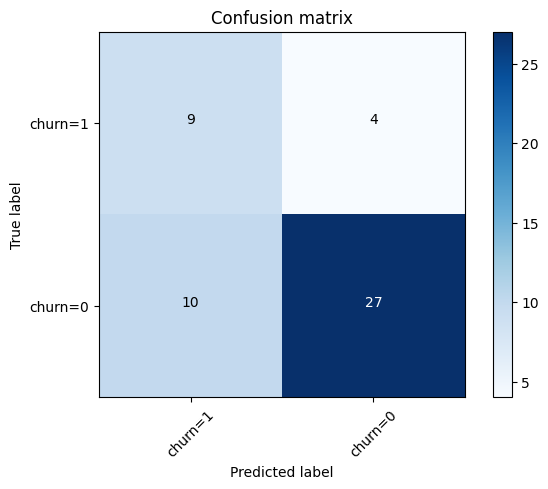

In [100]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

#### Top Left- True positive. Prediction is positive and correct
#### Top Right- False positive. Prediction is positive but wrong
#### Bottom left- False negative. Prediction is negative and wrong
#### Bottom Right- True negative. Prediction is negative but correct

In [101]:
print (classification_report(Y_test, yhat))


              precision    recall  f1-score   support

           0       0.87      0.73      0.79        37
           1       0.47      0.69      0.56        13

    accuracy                           0.72        50
   macro avg       0.67      0.71      0.68        50
weighted avg       0.77      0.72      0.73        50



Precision- a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

Recall- the true positive rate. Recall =  TP / (TP + FN)

The F1 score- the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

The average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72.



## Log loss for Evaluation

###  In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1. Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.


In [102]:
from sklearn.metrics import log_loss
log_loss(Y_test, yhat_prob)

0.5839640656479596